<a href="https://colab.research.google.com/github/Swap1984/swapnil/blob/main/ANS_Obesity_data_Decision_Tree_C5_0_CART(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing the necessary libraries to get the Decision tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [5]:
# import the dataset for Obesity
df = pd.read_csv("/content/Obesity Classification.csv")

In [6]:
# getting info about the dataset
df.head()




,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [7]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [26]:
# We have two features with categorical datatype.
#the target feature 'Label' and the predictive feature 'Gender'
#encoding the target feature firstly.
df['Label'].value_counts()

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64

In [30]:
# Encoding the Target Variable.
label_encoder = preprocessing.LabelEncoder()
df['Label']= label_encoder.fit_transform(df['Label'])
df['Label'].value_counts()


Label
3    47
0    29
2    20
1    12
Name: count, dtype: int64

In [31]:
df['Label'].unique()

array([0, 2, 3, 1])

In [32]:
df.head()


,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,0
1,2,30,Female,160,60,22.5,0
2,3,35,Male,180,90,27.3,2
3,4,40,Female,150,50,20.0,3
4,5,45,Male,190,100,31.2,1


In [34]:
# as we see there is one x variable feature 'Gender' that has be encoded as iits categorical.
# Thus using One hot ecoding fo the same .
#firstly spillting the X and Y variabe features.
x=df.iloc[:,0:7]
y=df['Label']





In [35]:
df_one_hot = pd.get_dummies(x,columns=['Gender'])
df_one_hot.head()

,ID,Age,Height,Weight,BMI,Label,Gender_Female,Gender_Male
0,1,25,175,80,25.3,0,False,True
1,2,30,160,60,22.5,0,True,False
2,3,35,180,90,27.3,2,False,True
3,4,40,150,50,20.0,3,True,False
4,5,45,190,100,31.2,1,False,True


In [22]:
df_one_hot.columns

Index(['ID', 'Age', 'Height', 'Weight', 'BMI', 'Label', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [44]:
# Redefining the column to get the target variable feature as the last column
colnames = ['ID',
 'Age',
 'Height',
 'Weight',
 'BMI','Gender_Female',
 'Gender_Male',
 'Label',
 ]
colnames

['ID',
 'Age',
 'Height',
 'Weight',
 'BMI',
 'Gender_Female',
 'Gender_Male',
 'Label']

In [40]:
df_one_hot = df_one_hot.reindex(columns=colnames)
df_one_hot.head()

,ID,Age,Height,Weight,BMI,Gender_Female,Gender_Male,Label
0,1,25,175,80,25.3,False,True,0
1,2,30,160,60,22.5,True,False,0
2,3,35,180,90,27.3,False,True,2
3,4,40,150,50,20.0,True,False,3
4,5,45,190,100,31.2,False,True,1


In [42]:
# converting the boolean values to integer for the one hot encoded feature.
df_one_hot = df_one_hot.astype(int)
df_one_hot.head()

,ID,Age,Height,Weight,BMI,Gender_Female,Gender_Male,Label
0,1,25,175,80,25,0,1,0
1,2,30,160,60,22,1,0,0
2,3,35,180,90,27,0,1,2
3,4,40,150,50,20,1,0,3
4,5,45,190,100,31,0,1,1


In [43]:
df_one_hot.info() # we get the entire dataset in the int datatype format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             108 non-null    int64
 1   Age            108 non-null    int64
 2   Height         108 non-null    int64
 3   Weight         108 non-null    int64
 4   BMI            108 non-null    int64
 5   Gender_Female  108 non-null    int64
 6   Gender_Male    108 non-null    int64
 7   Label          108 non-null    int64
dtypes: int64(8)
memory usage: 6.9 KB


In [53]:
# using the iloc command to separate the predictive features from the target feature.
# defining predictive features as x
x = df_one_hot.iloc[:,:-1]
x


,ID,Age,Height,Weight,BMI,Gender_Female,Gender_Male
0,1,25,175,80,25,0,1
1,2,30,160,60,22,1,0
2,3,35,180,90,27,0,1
3,4,40,150,50,20,1,0
4,5,45,190,100,31,0,1
...,...,...,...,...,...,...,...
103,106,11,175,10,3,0,1
104,107,16,160,10,3,1,0
105,108,21,180,15,5,0,1
106,109,26,150,15,5,1,0


In [55]:
# defining target feature as y
y = df_one_hot['Label']
y

0      0
1      0
2      2
3      3
4      1
      ..
103    3
104    3
105    3
106    3
107    3
Name: Label, Length: 108, dtype: int64

In [57]:
# splitting the predictive data in 80% train and 20% test datasets.
#This same configuration of the train-test data can be recalled with the random_state variable set as '1'
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=1)

x_train

,ID,Age,Height,Weight,BMI,Gender_Female,Gender_Male
59,62,21,160,35,16,1,0
86,89,28,150,25,10,1,0
33,36,44,140,75,25,1,0
35,38,54,130,85,27,1,0
46,49,57,210,105,28,0,1
...,...,...,...,...,...,...,...
75,78,50,130,60,22,1,0
9,10,70,120,20,10,1,0
72,75,35,190,65,22,0,1
12,13,28,180,80,25,0,1


In [58]:
y_train

59    3
86    3
33    2
35    2
46    1
     ..
75    0
9     3
72    0
12    0
37    2
Name: Label, Length: 86, dtype: int64

In [112]:
# Building Decision Tree Classifier using Entropy Criteria ,using the C.05 model
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

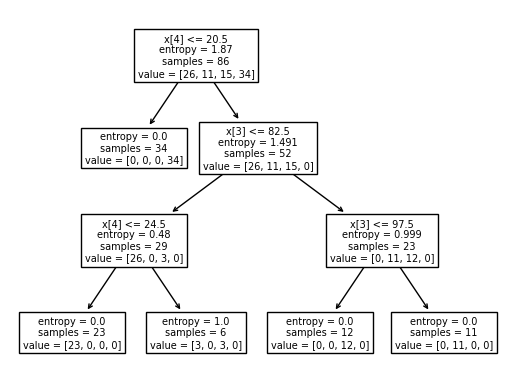

In [113]:
#PLotting the decision tree
tree.plot_tree(model);


In [114]:
y_train.value_counts()


Label
3    34
0    26
2    15
1    11
Name: count, dtype: int64

Above we can see the classification done for the traing dataset. to get the decision tree with original attributes of original features we plot the decision tree again as follows:


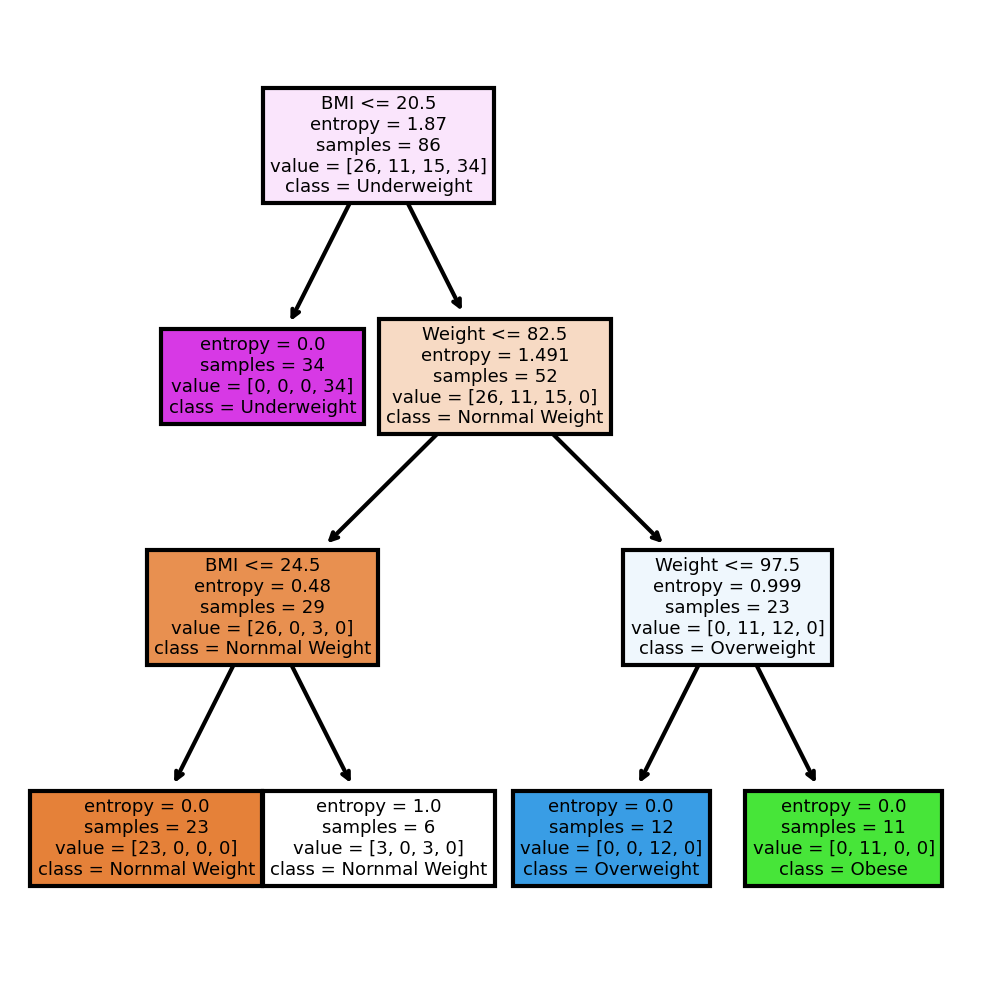

In [115]:
fn=['ID',
 'Age',
 'Height',
 'Weight',
 'BMI','Gender_Female',
 'Gender_Male'  ]
cn =['Nornmal Weight','Obese','Overweight','Underweight'] # the list of classes is given as 0,1,2,3 as per the uniquie command result.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

Thus our model is now trained to identify the classes by using the BMI index as the root node parameter to identify underweight and normal weight persons . if we find the BMI index to be above the 25.5 we classify them as  overwiegt and therest to ne normal weighted. Thereafter we check the weight feature for the overwiehted persons (criterion wt<=97.5) to conclue obesity is fount more  and
overweight if found less that the selected criterion.

In [104]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

3    13
0     4
2     4
1     1
Name: count, dtype: int64

In [116]:
y_test

100    3
90     3
92     3
89     3
101    3
55     2
88     3
54     2
48     0
66     2
58     0
2      2
87     3
102    3
56     1
95     3
107    3
42     2
62     0
105    3
17     3
97     3
Name: Label, dtype: int64

In [106]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1,2,3
Label,,,,
0,3,0,0,0
1,0,1,0,0
2,1,0,4,0
3,0,0,0,13


In [117]:
# getting the predictions in a array format to get accuracy
preds

array([3, 3, 3, 3, 3, 0, 3, 2, 0, 2, 0, 2, 3, 3, 1, 3, 3, 2, 0, 3, 3, 3])

In [118]:
# Accuracy
np.mean(preds==y_test)

0.9545454545454546

In [119]:
# To check the test data set after the index 25
y_test_slice = y_test[25:]
y_test_slice

Series([], Name: Label, dtype: int64)

why this function is not returning values ? we have test data after index no 25 ???

### Building Decision Tree Classifier (CART) using Gini Criteria

In [120]:

# Import decision tree classifier from  sklearn library
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [121]:
#Fitting model to the training data
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

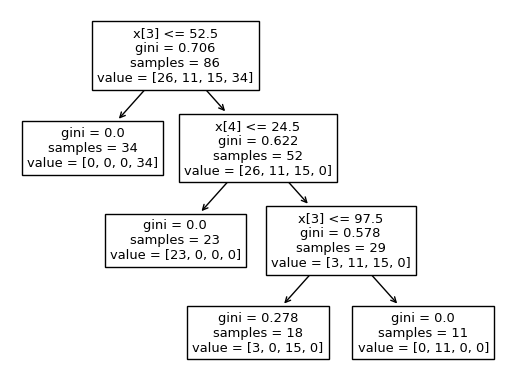

In [122]:
#PLotting the decision tree
tree.plot_tree(model_gini);


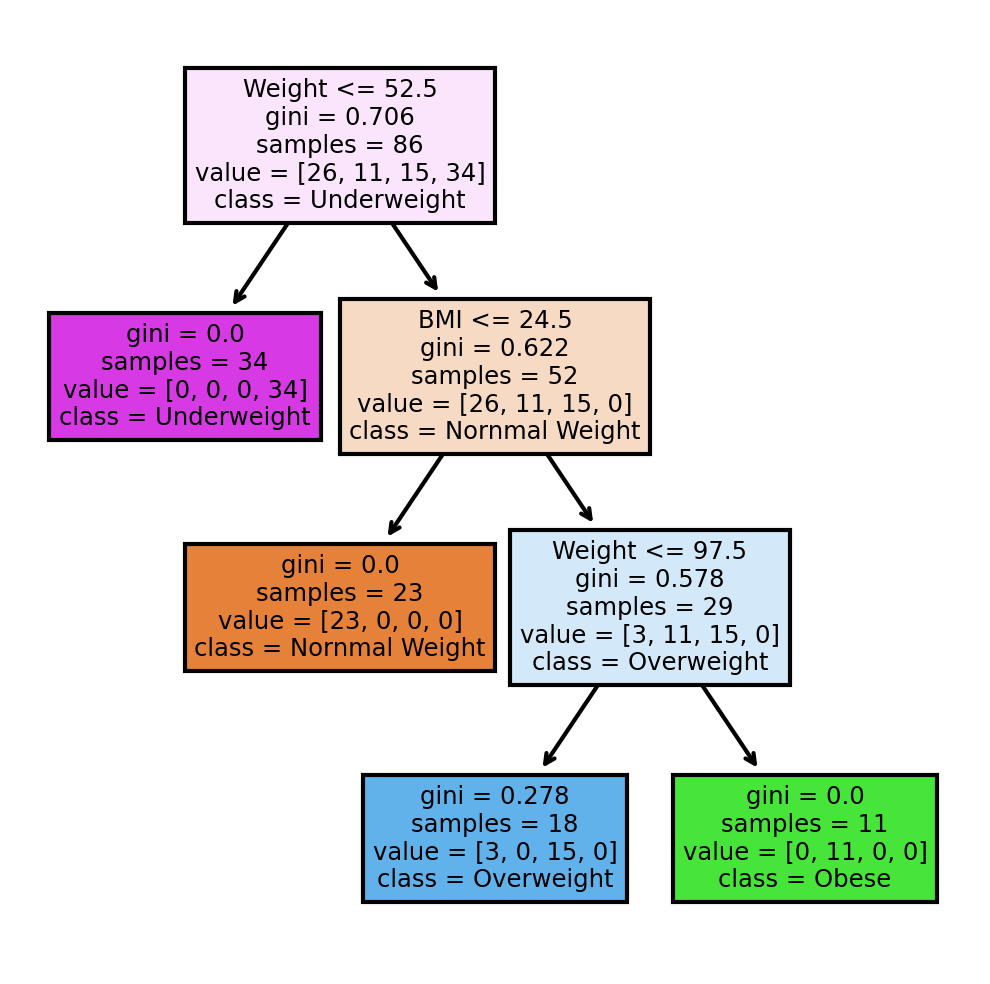

In [123]:
fn=['ID',
 'Age',
 'Height',
 'Weight',
 'BMI','Gender_Female',
 'Gender_Male'  ]
cn =['Nornmal Weight','Obese','Overweight','Underweight'] # the list of classes is given as 0,1,2,3 as per the uniquie command result.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [132]:
#Predicting on test data
preds_gini = model_gini.predict(x_test) # predicting on test data set
pd.Series(preds_gini).value_counts() # getting the count of each category

3    13
2     5
0     3
1     1
Name: count, dtype: int64

In [127]:
preds_gini

array([3, 3, 3, 3, 3, 2, 3, 2, 0, 2, 0, 2, 3, 3, 1, 3, 3, 2, 0, 3, 3, 3])

In [135]:
#Accuracy
np.mean(preds_gini==y_test)

1.0

Decision Tree Regression


In [136]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [150]:
array = df_one_hot.values # there are total 8 features in this dataset with col index from 0-7
X = array[:,0:7] #here we specify the index of the columns (here we say x has all avaues from all rows and from columns with index 0 to 6)
Y= array[:,7] # here we say Y contains the values from all rows and from the column with index no 7(target feature)

In [151]:
X

array([[  1,  25, 175,  80,  25,   0,   1],
       [  2,  30, 160,  60,  22,   1,   0],
       [  3,  35, 180,  90,  27,   0,   1],
       [  4,  40, 150,  50,  20,   1,   0],
       [  5,  45, 190, 100,  31,   0,   1],
       [  6,  50, 140,  40,  16,   1,   0],
       [  7,  55, 200, 110,  34,   0,   1],
       [  8,  60, 130,  30,  13,   1,   0],
       [  9,  65, 210, 120,  37,   0,   1],
       [ 10,  70, 120,  20,  10,   1,   0],
       [ 11,  18, 175,  70,  23,   0,   1],
       [ 12,  23, 160,  50,  20,   1,   0],
       [ 13,  28, 180,  80,  25,   0,   1],
       [ 14,  33, 150,  60,  22,   1,   0],
       [ 15,  38, 190,  90,  27,   0,   1],
       [ 16,  43, 140,  50,  20,   1,   0],
       [ 17,  48, 200, 100,  31,   0,   1],
       [ 19,  53, 130,  40,  16,   1,   0],
       [ 20,  58, 210, 110,  34,   0,   1],
       [ 21,  63, 120,  30,  13,   1,   0],
       [ 22,  68, 175,  80,  25,   0,   1],
       [ 23,  73, 160,  60,  22,   1,   0],
       [ 24,  78, 180,  90,  27,

In [149]:
Y

array([0, 0, 2, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 0, 2, 3, 1, 3, 1, 3, 0, 0,
       2, 3, 1, 3, 1, 3, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 3, 0, 0, 2, 0,
       2, 2, 1, 2, 0, 3, 0, 0, 2, 0, 2, 2, 1, 2, 0, 3, 0, 3, 0, 0, 2, 0,
       2, 2, 3, 3, 0, 3, 0, 3, 0, 0, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [140]:
array


array([[  1,  25, 175,  80,  25,   0,   1,   0],
       [  2,  30, 160,  60,  22,   1,   0,   0],
       [  3,  35, 180,  90,  27,   0,   1,   2],
       [  4,  40, 150,  50,  20,   1,   0,   3],
       [  5,  45, 190, 100,  31,   0,   1,   1],
       [  6,  50, 140,  40,  16,   1,   0,   3],
       [  7,  55, 200, 110,  34,   0,   1,   1],
       [  8,  60, 130,  30,  13,   1,   0,   3],
       [  9,  65, 210, 120,  37,   0,   1,   1],
       [ 10,  70, 120,  20,  10,   1,   0,   3],
       [ 11,  18, 175,  70,  23,   0,   1,   0],
       [ 12,  23, 160,  50,  20,   1,   0,   3],
       [ 13,  28, 180,  80,  25,   0,   1,   0],
       [ 14,  33, 150,  60,  22,   1,   0,   0],
       [ 15,  38, 190,  90,  27,   0,   1,   2],
       [ 16,  43, 140,  50,  20,   1,   0,   3],
       [ 17,  48, 200, 100,  31,   0,   1,   1],
       [ 19,  53, 130,  40,  16,   1,   0,   3],
       [ 20,  58, 210, 110,  34,   0,   1,   1],
       [ 21,  63, 120,  30,  13,   1,   0,   3],
       [ 22,  68, 17

In [152]:
# Splitting the array in train and test dataset with 33 % test data and 77% training data. random_state set to 2 for recalling the same distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [153]:
# Aplying Regression model to the data
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train, y_train)

DecisionTreeRegressor()

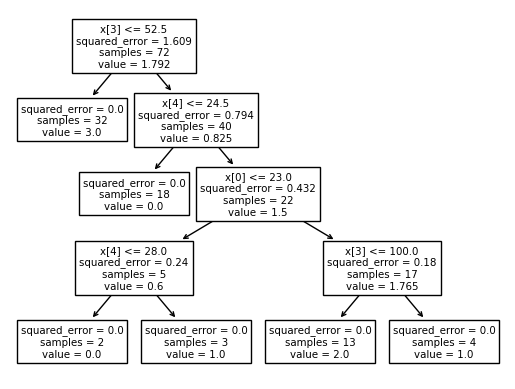

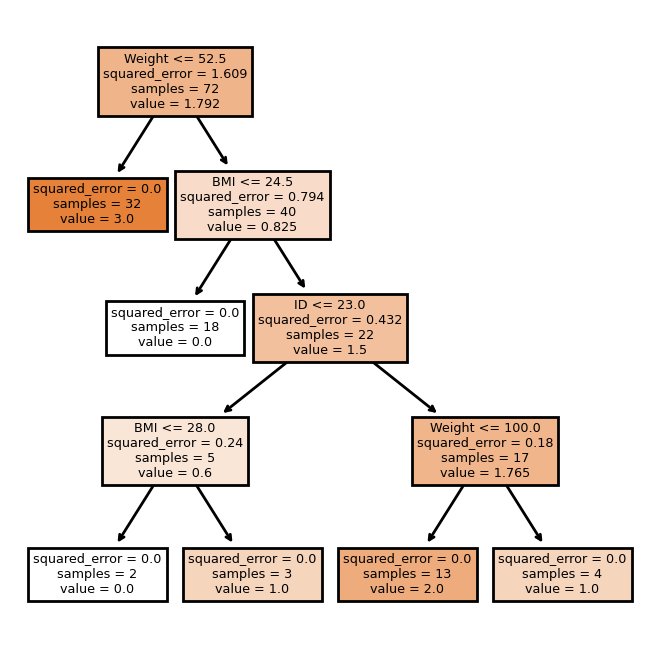

In [156]:
#PLotting the regression model
tree.plot_tree(model_reg);
fn=['ID',
 'Age',
 'Height',
 'Weight',
 'BMI','Gender_Female',
 'Gender_Male'  ]
cn =['Nornmal Weight','Obese','Overweight','Underweight'] # the list of classes is given as 0,1,2,3 as per the uniquie command result.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(model_reg,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [157]:
#Find the accuracy
model_reg.score(X_test,y_test)

0.834016393442623

**Iference based on Accuracy parameter.**

As seen above the CART has a 100% accuracy for clasiification which also suggests that the model is overfitted but the regression accuracy is 83.4% which indicates that the model is able to explain 86.4 % of variance and the rest 16.6 % is not explainable by the model.